In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The below is needed for pandas to be able to read Excel files
!pip install openpyxl
from IPython.display import display
print('Setup completed successfully.')


In [ ]:
df = pd.read_csv(r'C:\Users\User\ML_Projects\data\Titanic-Dataset.csv')
test_df = pd.read_csv(r'C:\Users\User\ML_Projects\data\test.csv')
# Showing the first five rows of the DataFrame
display(df.head())

In [32]:
# General information about the DataFrame
print(f'The DataFrame has {df.shape[0]} rows, and {df.shape[1]} columns.\n')
display(df.info())
# Dispalying the DF's columns names as a list
col_names = df.columns.to_list()
print(col_names)
# Statistical summary of the DataFrame
display(df.describe().T)


The DataFrame has 891 rows, and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Data Cleaning 


In [36]:
# Renaming some columns for better clarity
df = df.rename(columns={'Pclass':'Passenger_Class',
                        'SibSp':'Siblings_Spouses_No.',
                        'Parch':'Parents_Children_No.'})

# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
print(f'Numerical columns in DataFrame:\n{numerical_cols.to_list()}')
print('---'*20)
print(f'Categorical columns in the DataFrame:\n{categorical_cols.to_list()}')
print('---'*20,'\n')

# checking for the missing values in the DataFrame
#print(f'The number of missing values in each column is:\n{df.isna().sum().sort_values(ascending=False)}')
display(f'Duplicated values are: {df.duplicated().sum()}')

# Missing values percentage in each column
print('---'*20)
print(f'The percentage of missing values in each column is:\n {(((df.isna().sum())/df.shape[0])).sort_values(ascending=False)}')

# handling missing values in the DataFrame
#df = df.drop(columns=['Cabin'])
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        pass
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        pass

# Another approach to handle missing values
'''for col in df.columns:
    if df[col].isna().sum() > 0:
        if col in numerical_cols:
            df[col] = df[col].fillna(df[col].mean())
        elif col in categorical_cols:
            df[col] = df[col].fillna(df[col].mode()[0])'''

# Another approach to handle missing values, to be used if we didnt define 
# numerical_cols and categorical_cols
'''for col in df.columns:
    if df[col].dtype in ['int64','float64','Int64']:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())
        else:
            continue
    elif df[col].dtype in ['object','category']:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            continue'''

# Verifying that there are no missing values in the DataFrame
print(f'The number of missing values after handling is:\n{df.isna().sum().sort_values(ascending=False)}')


Numerical columns in DataFrame:
['PassengerId', 'Survived', 'Passenger_Class', 'Age', 'Siblings_Spouses_No.', 'Parents_Children_No.', 'Fare']
------------------------------------------------------------
Categorical columns in the DataFrame:
['Name', 'Sex', 'Ticket', 'Embarked']
------------------------------------------------------------ 



'Duplicated values are: 0'

------------------------------------------------------------
The percentage of missing values in each column is:
 Embarked                0.002245
Survived                0.000000
PassengerId             0.000000
Passenger_Class         0.000000
Name                    0.000000
Age                     0.000000
Sex                     0.000000
Siblings_Spouses_No.    0.000000
Parents_Children_No.    0.000000
Ticket                  0.000000
Fare                    0.000000
dtype: float64
The number of missing values after handling is:
PassengerId             0
Survived                0
Passenger_Class         0
Name                    0
Sex                     0
Age                     0
Siblings_Spouses_No.    0
Parents_Children_No.    0
Ticket                  0
Fare                    0
Embarked                0
dtype: int64


In [37]:
for col in df.columns.to_list():
    print(f'The Data type of {col} is: {df[col].dtype}')
    print('\n','---'*10,'\n')
# Converting Data types if needed
df['Age'] = df['Age'].astype('int64')
print(f'The Data type of Age after conversion is: {df["Age"].dtype}')
display(df.Age.sample(20))

The Data type of PassengerId is: int64

 ------------------------------ 

The Data type of Survived is: int64

 ------------------------------ 

The Data type of Passenger_Class is: int64

 ------------------------------ 

The Data type of Name is: object

 ------------------------------ 

The Data type of Sex is: object

 ------------------------------ 

The Data type of Age is: float64

 ------------------------------ 

The Data type of Siblings_Spouses_No. is: int64

 ------------------------------ 

The Data type of Parents_Children_No. is: int64

 ------------------------------ 

The Data type of Ticket is: object

 ------------------------------ 

The Data type of Fare is: float64

 ------------------------------ 

The Data type of Embarked is: object

 ------------------------------ 

The Data type of Age after conversion is: int64


516    34
36     28
734    23
88     23
294    24
733    23
764    16
160    44
490    28
546    19
594    37
326    61
702    18
627    21
17     28
406    51
537    30
541     9
417    18
680    28
Name: Age, dtype: int64

##### Univariate Analysis

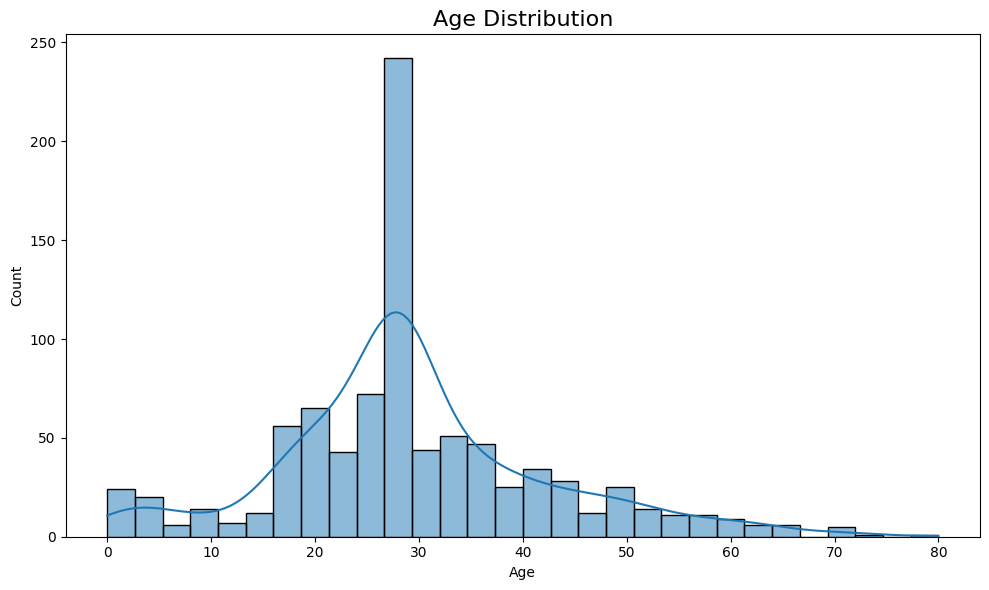

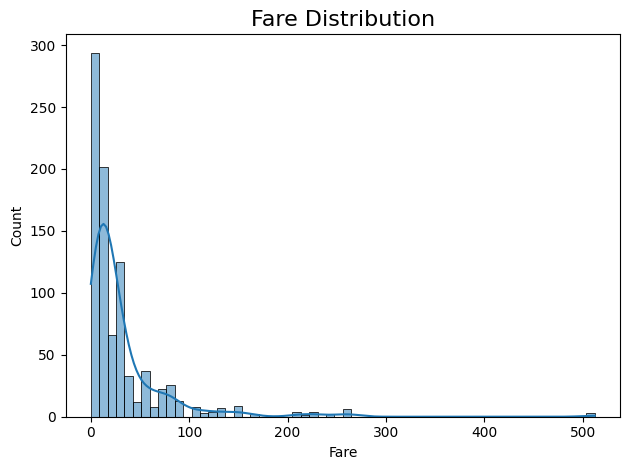

,PassengerId,Survived,Passenger_Class,Name,Sex,Age,Siblings_Spouses_No.,Parents_Children_No.,Ticket,Fare,Embarked,transformed_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,3.135494
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3.663562
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,3.295837
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,3.583519
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,3.583519


In [44]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,
             x='Age',
             kde=True,
             log_scale=False)
plt.title('Age Distribution',fontsize=16)
plt.tight_layout()
plt.show()
'''df['transformed_Age'] = np.log1p(df['Age'])
sns.histplot(data=df,
             x='transformed_Age',
             kde=True)
plt.title('Transformed Age Distribution',fontsize=16)
plt.tight_layout()
plt.show()

sns.histplot(x=df['Age']**0.5,
             kde=True)
plt.title('Square Root Transformed Age Distribution',fontsize=16)
plt.tight_layout()
plt.show()'''

sns.histplot(data=df,
             x='Fare',
             kde=True)
plt.title('Fare Distribution',fontsize=16)
plt.tight_layout()
plt.show()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_29464\1839363200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


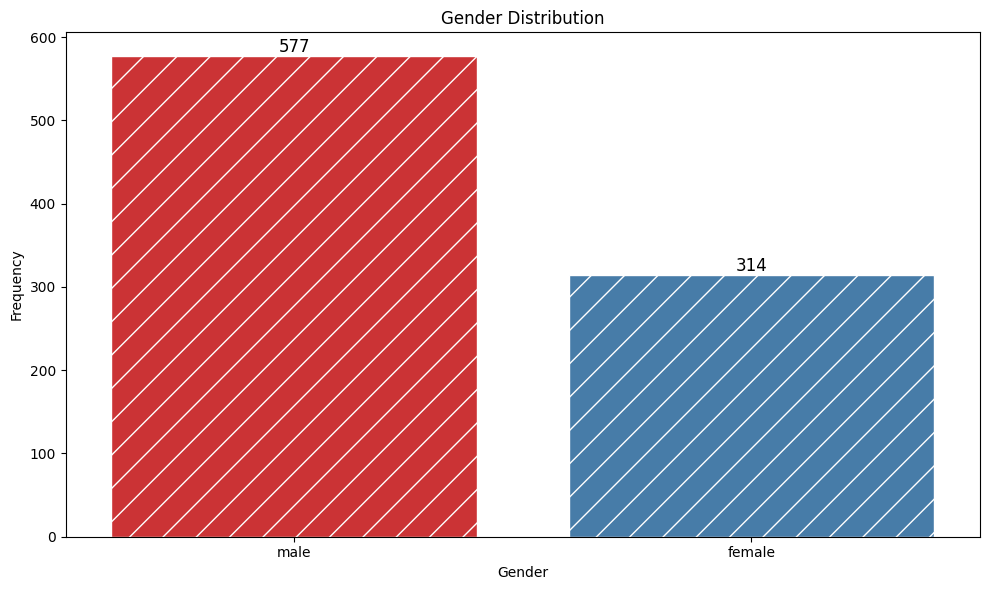

In [53]:
df['PassengerId'].nunique()
df['Sex'].value_counts()
df['Siblings_Spouses_No.'].value_counts()
plt.figure(figsize=(10,6),dpi=100)
bars = sns.countplot(data=df,
              x='Sex',
              palette='Set1')
for bar in bars.patches:
    y_value = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    if y_value > 0:
        bars.text(x_pos,y_value,int(y_value),ha='center',va='bottom',fontsize=12)
    bar.set_edgecolor('white')
    bar.set_hatch('/')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
